In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

from dataset.dataset import NoCDataset
from model.vanilla import VanillaModel


In [2]:
from dgl.dataloading import GraphDataLoader
from torch.utils.data.sampler import SubsetRandomSampler

dataset = NoCDataset()
print(f"#Samples = {len(dataset)}")

num_examples = len(dataset)
num_train = int(num_examples * 0.9)

train_sampler = SubsetRandomSampler(torch.arange(num_train))
test_sampler = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader = GraphDataLoader(
    dataset, sampler=train_sampler, batch_size=1, drop_last=False)
test_dataloader = GraphDataLoader(
    dataset, sampler=test_sampler, batch_size=1, drop_last=False)


#Samples = 2023


In [3]:
device = "cpu"
# device = "cuda:0"

model = VanillaModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
losses = []

epoches = 30
for e in range(epoches):
    print("#" * 60)
    print(f"epoch = {e}")
    print("#" * 60)

    pbar = tqdm(train_dataloader)

    for i, data in enumerate(pbar):

        g, congestion = data
        g = g.to(device)

        pred = model(g)
        loss = F.mse_loss(pred, congestion.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 30 == 0:
            losses.append(loss.item())
            pbar.set_postfix(loss=loss.item())



############################################################
epoch = 0
############################################################


100%|██████████| 1820/1820 [00:08<00:00, 202.74it/s, loss=1.69]  


############################################################
epoch = 1
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 202.19it/s, loss=2.06]  


############################################################
epoch = 2
############################################################


100%|██████████| 1820/1820 [00:08<00:00, 205.46it/s, loss=1.77]   


############################################################
epoch = 3
############################################################


100%|██████████| 1820/1820 [00:08<00:00, 203.42it/s, loss=0.727] 


############################################################
epoch = 4
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 199.39it/s, loss=0.0866] 


############################################################
epoch = 5
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 201.06it/s, loss=37.4]   


############################################################
epoch = 6
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 198.41it/s, loss=2.22]   


############################################################
epoch = 7
############################################################


100%|██████████| 1820/1820 [00:08<00:00, 202.76it/s, loss=0.181]   


############################################################
epoch = 8
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 197.96it/s, loss=0.0951] 


############################################################
epoch = 9
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 201.22it/s, loss=0.00533]


############################################################
epoch = 10
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 200.60it/s, loss=1.68]    


############################################################
epoch = 11
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 200.12it/s, loss=0.0374] 


############################################################
epoch = 12
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 200.16it/s, loss=0.132]  


############################################################
epoch = 13
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 200.45it/s, loss=0.151]  


############################################################
epoch = 14
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 199.00it/s, loss=0.0535]  


############################################################
epoch = 15
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 199.22it/s, loss=0.553]  


############################################################
epoch = 16
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 200.26it/s, loss=1.42]   


############################################################
epoch = 17
############################################################


100%|██████████| 1820/1820 [00:08<00:00, 202.28it/s, loss=0.393]  


############################################################
epoch = 18
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 201.26it/s, loss=0.0029] 


############################################################
epoch = 19
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 199.72it/s, loss=1.07]   


############################################################
epoch = 20
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 198.90it/s, loss=0.168]  


############################################################
epoch = 21
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 200.68it/s, loss=1.43]   


############################################################
epoch = 22
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 198.60it/s, loss=0.323]   


############################################################
epoch = 23
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 200.31it/s, loss=0.107]  


############################################################
epoch = 24
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 198.36it/s, loss=0.129]  


############################################################
epoch = 25
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 201.18it/s, loss=0.215]   


############################################################
epoch = 26
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 197.31it/s, loss=0.00836] 


############################################################
epoch = 27
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 200.17it/s, loss=0.0888] 


############################################################
epoch = 28
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 197.45it/s, loss=13]     


############################################################
epoch = 29
############################################################


100%|██████████| 1820/1820 [00:09<00:00, 200.90it/s, loss=4.25]   


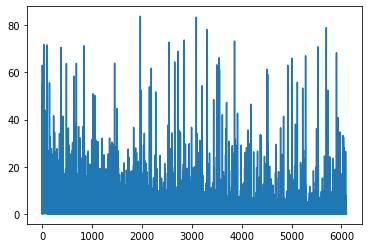

In [8]:
plt.plot(losses)

In [4]:
# test accuracy
# we use relative error to measure

mae_losses = []

pbar = tqdm(test_dataloader)
for i, data in enumerate(pbar):

    g, congestion = data
    congestion = congestion.squeeze()
    g = g.to(device)

    pred = model(g)
    pred = F.relu(pred)
    loss = F.mse_loss(pred, congestion)

    print(f"iteration: {i}; loss = {loss.item()}")
    print(f"pred = {pred.detach().numpy()}")
    print(f"congestion = {congestion.numpy()}")

    mae_losses.append(F.l1_loss(pred, congestion))

print("*" * 30)
mae_losses = torch.stack(mae_losses).mean()
print(f"mae loss: {mae_losses}")


 25%|██▍       | 50/203 [00:00<00:00, 248.82it/s]

iteration: 0; loss = 0.0002903510467149317
pred = [0. 0.]
congestion = [0.02409776 0.        ]
iteration: 1; loss = 5.269167900085449
pred = [6.362832 6.307218]
congestion = [8.630323 8.630323]
iteration: 2; loss = 0.0
pred = [0. 0.]
congestion = [0. 0.]
iteration: 3; loss = 0.35025525093078613
pred = [0.52705145 0.65401477]
congestion = [0.         0.00383996]
iteration: 4; loss = 5.1851049647666514e-05
pred = [0.         0.01050374]
congestion = [0.00032552 0.00032552]
iteration: 5; loss = 0.02130516618490219
pred = [0.25526386 0.17305414]
congestion = [0.14273566 0.        ]
iteration: 6; loss = 0.0023364219814538956
pred = [0.07578307 0.00775635]
congestion = [0.00786634 0.        ]
iteration: 7; loss = 0.004489779472351074
pred = [0. 0.]
congestion = [0.09416034 0.01064846]
iteration: 8; loss = 0.0
pred = [0. 0.]
congestion = [0. 0.]
iteration: 9; loss = 30.85293197631836
pred = [5.6451125 5.462469 ]
congestion = [0. 0.]
iteration: 10; loss = 24.75495147705078
pred = [4.903796  5.

 37%|███▋      | 75/203 [00:00<00:00, 245.92it/s]

iteration: 51; loss = 0.018639113754034042
pred = [0.07872567 0.11507998]
congestion = [0.23375736 0.        ]
iteration: 52; loss = 5.450107097625732
pred = [2.3651667 2.3035192]
congestion = [0. 0.]
iteration: 53; loss = 2.5456912517547607
pred = [1.829587  1.5812566]
congestion = [0.11473819 0.11473819]
iteration: 54; loss = 2.6406068801879883
pred = [6.399624 6.349278]
congestion = [7.9992504 7.9992504]
iteration: 55; loss = 0.5916706323623657
pred = [2.2301722 2.0835383]
congestion = [1.3891438 1.3936017]
iteration: 56; loss = 0.00015268691640812904
pred = [0.0176197  0.01732802]
congestion = [0.01988099 0.        ]
iteration: 57; loss = 4.721133232116699
pred = [6.357549  6.3012896]
congestion = [8.502054 8.502054]
iteration: 58; loss = 0.03315120190382004
pred = [0.29203975 0.2547071 ]
congestion = [0.25426808 0.        ]
iteration: 59; loss = 0.00044468362466432154
pred = [0. 0.]
congestion = [0.00148607 0.02978521]
iteration: 60; loss = 0.005733382888138294
pred = [0. 0.]
cong

 61%|██████    | 124/203 [00:00<00:00, 231.43it/s]

iteration: 98; loss = 0.0006969466921873391
pred = [0.04458296 0.        ]
congestion = [0.08191784 0.        ]
iteration: 99; loss = 4.223580360412598
pred = [6.31982  6.258944]
congestion = [8.344292 8.344292]
iteration: 100; loss = 0.0012244503013789654
pred = [0.04948637 0.        ]
congestion = [0. 0.]
iteration: 101; loss = 0.022501563653349876
pred = [0.17995675 0.11259741]
congestion = [0.00016534 0.        ]
iteration: 102; loss = 0.006316143088042736
pred = [0.11190644 0.01045153]
congestion = [0. 0.]
iteration: 103; loss = 13.873697280883789
pred = [3.7663891 3.682863 ]
congestion = [0.00011905 0.00011905]
iteration: 104; loss = 1.8534542322158813
pred = [6.295926 6.232127]
congestion = [7.625069 7.625069]
iteration: 105; loss = 2.211327314376831
pred = [6.2959256 6.2321267]
congestion = [7.750737 7.750737]
iteration: 106; loss = 0.006321825087070465
pred = [0.10868876 0.03007279]
congestion = [6.6688335e-05 1.0056908e-03]
iteration: 107; loss = 5.502472877502441
pred = [2.3

 85%|████████▍ | 172/203 [00:00<00:00, 230.22it/s]

iteration: 143; loss = 9.992276191711426
pred = [4.2896466 4.266248 ]
congestion = [7.438982 7.438982]
iteration: 144; loss = 19.627269744873047
pred = [4.495831 4.363719]
congestion = [0. 0.]
iteration: 145; loss = 0.010020734742283821
pred = [0.10864836 0.09075794]
congestion = [0. 0.]
iteration: 146; loss = 16.640396118164062
pred = [4.5060863 4.169875 ]
congestion = [8.392225 8.433526]
iteration: 147; loss = 4.51747989654541
pred = [6.357548 6.301289]
congestion = [8.454669 8.454669]
iteration: 148; loss = 0.0008937461534515023
pred = [0.01716486 0.0389563 ]
congestion = [9.2535331e-05 2.7777778e-04]
iteration: 149; loss = 2.676150321960449
pred = [1.841329  1.5898007]
congestion = [0.08451191 0.08451191]
iteration: 150; loss = 2.2602033615112305
pred = [6.3377423 6.279058 ]
congestion = [7.811511 7.811511]
iteration: 151; loss = 2.875455141067505
pred = [5.474763  4.7114015]
congestion = [7.360863  6.1924605]
iteration: 152; loss = 1.4868736267089844
pred = [1.3330352 1.0940471]
c

100%|██████████| 203/203 [00:00<00:00, 236.86it/s]

iteration: 192; loss = 0.00029088943847455084
pred = [0.         0.02412009]
congestion = [0. 0.]
iteration: 193; loss = 70.08749389648438
pred = [1.246005   0.95343024]
congestion = [9.423516 9.515164]
iteration: 194; loss = 2.1858530044555664
pred = [6.308793 6.246567]
congestion = [7.7558155 7.7558155]
iteration: 195; loss = 0.3929092288017273
pred = [0. 0.]
congestion = [0.5303829  0.71029043]
iteration: 196; loss = 1.4013173768034903e-06
pred = [0. 0.]
congestion = [0.         0.00167411]
iteration: 197; loss = 5.837662696838379
pred = [2.4280207 2.4041715]
congestion = [0. 0.]
iteration: 198; loss = 1.1414275604693103e-06
pred = [0. 0.]
congestion = [0.00106838 0.00106838]
iteration: 199; loss = 35.906742095947266
pred = [6.0493555 5.934541 ]
congestion = [0. 0.]
iteration: 200; loss = 0.8584591150283813
pred = [0.9565288 0.8955283]
congestion = [0. 0.]
iteration: 201; loss = 0.5534491539001465
pred = [0.7797011 0.7085667]
congestion = [0.         0.00219247]
iteration: 202; loss